In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import acquire
import prepare

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
#titanic = acquire.get_titanic_data(cached=True)

In [ ]:
#train, validate, test = prepare.prep_titanic(titanic)

In [ ]:
#train.info()

In [ ]:
#validate.info()

In [ ]:
#test.info()

# Messing around with titanic data for exploratory data analysis

In [7]:
df = acquire.get_titanic_data(cached=True)
train, validate, test = prepare.prep_titanic(df)

train = train[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()

,survived,pclass,sex,age,fare,embark_town,alone
583,0,1,male,36.000000,40.1250,Cherbourg,1
337,1,1,female,41.000000,134.5000,Cherbourg,1
50,0,3,male,7.000000,39.6875,Southampton,0
218,1,1,female,32.000000,76.2917,Cherbourg,1
31,1,1,female,29.916875,146.5208,Cherbourg,0


In [10]:
survival_rate = train.survived.mean()

Text(0.5, 0, 'Survived')

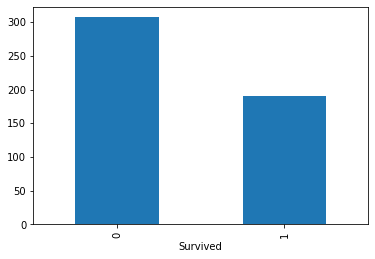

In [14]:
train.survived.value_counts().plot.bar()
plt.xlabel('Survived')

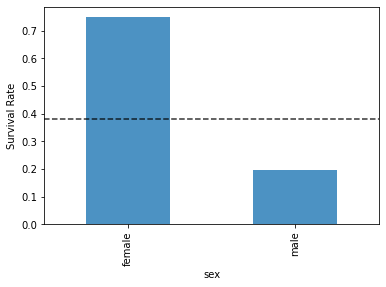

In [15]:
train.groupby('sex').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

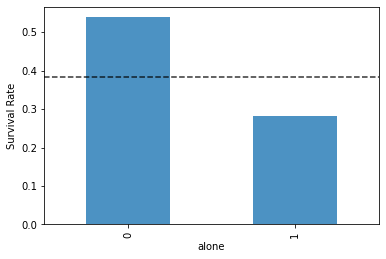

In [17]:
train.groupby('alone').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [19]:
# Exploring 2 categorical variables, but now we're treating survived as a category, not a number.
pd.crosstab(train.survived, train.sex)

sex,female,male
survived,,
0,42,265
1,125,65


In [21]:
pd.crosstab(train.survived, train.alone)

alone,0,1
survived,,
0,90,217
1,105,85


In [22]:
train.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,307.0,30.320079,12.564022,1.00,23.0,29.916875,34.75,74.0
1,190.0,29.265382,14.337321,0.67,22.0,29.916875,36.00,80.0


In [23]:
train.groupby('survived').fare.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,307.0,22.953323,33.881277,0.0,7.8542,9.5,26.0000,263.0000
1,190.0,50.370658,74.088083,0.0,13.0000,26.0,57.9792,512.3292


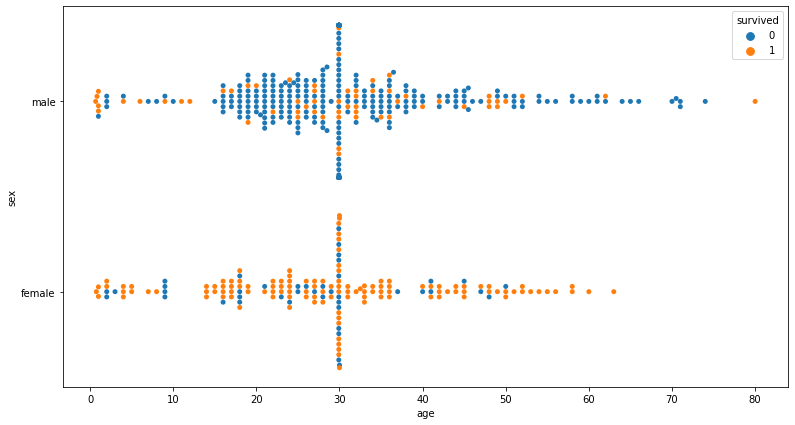

In [24]:
plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='sex', x='age', hue='survived')

# Messing around with the TELCO project dataset

In [47]:
# We need to import data from SQL
# Connect to employees database
#defines function to create a sql url using personal credentials

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('telco_churn')

query = '''
select * 
from customers as c
join contract_types as ct
on ct.contract_type_id = c.contract_type_id
join internet_service_types as i_s
on i_s.internet_service_type_id = c.internet_service_type_id
join payment_types as pt
on pt.payment_type_id = c.payment_type_id;
'''
df = pd.read_sql(query, url)

In [48]:
#Cleaned Data

# Delete columns 'customer_id', contract_type_id, internet_service_type_id, payment_type_id    
df.drop(columns = ['customer_id','contract_type_id','internet_service_type_id', 'payment_type_id'], inplace = True)
# Replace partner, dependents, churn, phone_service, paperless billing, with boolean value
df.partner.replace(['Yes', 'No'], [1,0], inplace = True)
df.dependents.replace(['Yes', 'No'], [1,0], inplace = True)
df.churn.replace(['Yes', 'No'], [1,0], inplace = True)
df.phone_service.replace(['Yes', 'No'], [1,0], inplace = True)
df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
gender = df.gender.str.get_dummies()
df = pd.concat([df, gender], axis=1)
df.rename(columns = {'Female': 'is_female', 'Male': 'is_male'}, inplace = True)
df.drop(columns = ['gender'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.multiple_lines.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_multiple_lines', 'Yes': 'yes_multiple_lines'}, inplace = True)
df.drop(columns = ['multiple_lines'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.online_security.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_online_security', 'Yes': 'yes_online_security'}, inplace = True)
df.drop(columns = ['online_security'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.online_backup.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_online_backup', 'Yes': 'yes_online_backup'}, inplace = True)
df.drop(columns = ['online_backup'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.device_protection.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_device_protection', 'Yes': 'yes_device_protection'}, inplace = True)
df.drop(columns = ['device_protection'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.tech_support.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_tech_support', 'Yes': 'yes_tech_support'}, inplace = True)
df.drop(columns = ['tech_support'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.streaming_tv.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_streaming_tv', 'Yes': 'yes_streaming_tv'}, inplace = True)
df.drop(columns = ['streaming_tv', 'No internet service'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.streaming_movies.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_streaming_movies', 'Yes': 'yes_streaming_movies'}, inplace = True)
df.drop(columns = ['streaming_movies'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.contract_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'Month-to-month': 'month_to_month_contract', 'One year': 'one_year_contract', 'Two year': 'two_year_contract'}, inplace = True)
df.drop(columns = ['contract_type'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.internet_service_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'DSL': 'dsl', 'Fiber optic': 'fiber_optic'}, inplace = True)
df.drop(columns = ['internet_service_type','None'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.payment_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'Bank transfer (automatic)': 'auto_bank_transfer', 'Credit card (automatic)': 'auto_credit_card', 'Electronic check': 'e_check', 'Mailed check': 'mail_check'}, inplace = True)
df.drop(columns = ['payment_type'], inplace = True)
# Change total_charges to float from object
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   senior_citizen           7043 non-null   int64  
 1   partner                  7043 non-null   int64  
 2   dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   phone_service            7043 non-null   int64  
 5   paperless_billing        7043 non-null   int64  
 6   monthly_charges          7043 non-null   float64
 7   total_charges            7032 non-null   float64
 8   churn                    7043 non-null   int64  
 9   is_female                7043 non-null   int64  
 10  is_male                  7043 non-null   int64  
 11  no_multiple_lines        7043 non-null   int64  
 12  No phone service         7043 non-null   int64  
 13  yes_multiple_lines       7043 non-null   int64  
 14  no_online_security      

In [ ]:
'''
Things to Consider:
1. How to handle colums that could be booleans (Yes/No/Null)
   -Keep as object or turn to int ?
   -Columns include '''
   
  

''' contract_type
    
2. Total charges change to float, it is currently an object
3. Delete origional dummy variable columns
'''

In [50]:
# dummy multiple lines

df

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,is_female,...,yes_streaming_movies,month_to_month_contract,one_year_contract,two_year_contract,dsl,fiber_optic,auto_bank_transfer,auto_credit_card,e_check,mail_check
0,0,0,0,9,1,0,59.90,542.40,0,0,...,1,1,0,0,1,0,0,0,0,1
1,0,0,1,9,1,1,69.40,571.45,0,1,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,7,1,1,48.20,340.35,0,1,...,0,1,0,0,1,0,0,0,1,0
3,1,0,0,1,0,1,25.10,25.10,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,1,1,1,0,0,30.50,30.50,1,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,28,1,1,20.30,487.95,0,0,...,0,0,0,1,0,0,0,1,0,0
7039,0,0,0,63,1,0,25.25,1559.30,0,0,...,0,0,0,1,0,0,0,0,0,1
7040,0,1,0,71,1,1,24.40,1725.40,0,1,...,0,0,0,1,0,0,0,1,0,0
7041,0,1,1,67,1,1,19.25,1372.90,0,1,...,0,0,0,1,0,0,1,0,0,0


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64